# Import Libraries

In [92]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


# Plot Param Initialization

In [93]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    #


# Original Data By Stratified Sampling

In [94]:
org_train_frame_x = pd.read_csv('data/original/original_x_train.csv')
org_train_frame_y = pd.read_csv('data/original/original_y_train.csv')
org_test_frame_x = pd.read_csv('data/original/original_x_test.csv')
org_test_frame_y = pd.read_csv('data/original/original_y_test.csv')

#  Normalized Data 

min max normalization

In [95]:
mNorm_train_frame_x = pd.read_csv('data/mNorm/X_train.csv')
mNorm_train_frame_y = pd.read_csv('data/mNorm/y_train.csv')
mNorm_test_frame_x = pd.read_csv('data/mNorm/X_test.csv')
mNorm_test_frame_y = pd.read_csv('data/mNorm/y_test.csv')

z normalization

In [96]:
zNorm_train_frame_x = pd.read_csv('data/zNorm/X_train.csv')
zNorm_train_frame_y = pd.read_csv('data/zNorm/y_train.csv')
zNorm_test_frame_x = pd.read_csv('data/zNorm/X_test.csv')
zNorm_test_frame_y = pd.read_csv('data/zNorm/y_test.csv')

# New Feature representation data 

Factor Analysis 

In [97]:
fa_train_frame_x = pd.read_csv('data/fa/X_train.csv')
fa_train_frame_y = pd.read_csv('data/fa/y_train.csv')
fa_test_frame_x = pd.read_csv('data/fa/X_test.csv')
fa_test_frame_y = pd.read_csv('data/fa/y_test.csv')

Linear discriminant analysis

In [98]:
lda_train_frame_x = pd.read_csv('data/lda/X_train.csv')
lda_train_frame_y = pd.read_csv('data/lda/y_train.csv')
lda_test_frame_x = pd.read_csv('data/lda/X_test.csv')
lda_test_frame_y = pd.read_csv('data/lda/y_test.csv')

Principle Componant Analysis

In [99]:
pca_train_frame_x = pd.read_csv('data/pca/X_train.csv')
pca_train_frame_y = pd.read_csv('data/pca/y_train.csv')
pca_test_frame_x = pd.read_csv('data/pca/X_test.csv')
pca_test_frame_y = pd.read_csv('data/pca/y_test.csv')

t-distributed stochastic neighbor embedding

In [100]:
tsne_train_frame_x = pd.read_csv('data/tsne/X_train.csv')
tsne_train_frame_y = pd.read_csv('data/tsne/y_train.csv')
tsne_test_frame_x = pd.read_csv('data/tsne/X_test.csv')
tsne_test_frame_y = pd.read_csv('data/tsne/y_test.csv')

#  Custom Helper Functions

In [101]:
"""
input: tr_x,tr_y,te_x,te_y
tr_x = Training frame 
tr_y = Training Labels
te_x = Testing frame
te_y = Testing Labels
output: train_x,train_y,test_x,test_y 
train_x = Numpy Array of training data,
train_y = Numpy Array of training labels 
test_x = Numpy Array of testing data
test_y = Numpy Array of testing labels
"""
def data_fram_to_array(tr_x,tr_y,te_x,te_y):
    train_x = np.array(tr_x)
    train_y = np.array(tr_y)

    test_x = np.array(te_x)
    test_y = np.array(te_y)
    return train_x,train_y,test_x,test_y 
# Y = to_categorical(Y)

"""
input: label_y,label_encoder
label_y = Numpy Label array 
label_encoder = Label Encoder 
output: label_y
label_y = Transformed Categorical Labels by Label Encoding
"""
def Label_Encoding(label_y,label_encoder):
#     label_encoder = LabelEncoder()
    label_encoder.fit(label_y) 
    label_y = label_encoder.transform(label_y)
    label_y = to_categorical(label_y)
    return label_y

# Function to Test the Trained Model passed as parameter 
"""
input: train_xx, train_yy, test_xx,test_yy,model,te_size,val_split,epoch,batch_size
train_xx = Training data array 
train_yy = Training Label array 
test_xx = Testing data array
test_yy = testing data label
model = copiled model 
te_size = number of items to test 
val_split = cross validation percentage for model fitting
epoch = iteration number 
batch_size = batch number
"""
def NN_Model_Result(train_xx, train_yy, test_xx,
                    test_yy,model,te_size,val_split,
                    epoch,batch_size):
    #Label creation
    label_encoder = LabelEncoder()
    train_yy = Label_Encoding(train_yy,label_encoder)
    test_yy = Label_Encoding(test_yy,label_encoder)
    #fitting
    history = model.fit(train_xx, train_yy,validation_split=val_split, epochs = epoch, batch_size = batch_size)
    #plotting 
    plt.plot(history.history['accuracy'],marker = 'D',label ='train')
    plt.plot(history.history['val_accuracy'],marker = '<',label='valid')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
#     plt.savefig("accuracy_plot.png",bbox_inches= "tight")
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'],marker = 'D',label ='train')
    plt.plot(history.history['val_loss'],marker = '<',label='valid')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
#     plt.savefig("loss_plot_nn.png",bbox_inches= "tight")
    plt.show()
    
    #Evaluation
    scores = model.evaluate(test_xx, test_yy)
    #Accuracy Score
    for i, m in enumerate(model.metrics_names):
        print("\n%s: %.3f"% (m, scores[i]))
    #predictioin
    idx = np.random.randint(len(test_xx),size = te_size)
    pred = model.predict(test_xx[idx,:])
    
    #Prediction Summary Generation with precison recall and f1 and confusion matrix
    pred_ = np.argmax(pred, axis=1)
    pred_ = label_encoder.inverse_transform(pred_)
#     true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_yy[:test_size]), axis = 1)[:,1])
    true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_yy[idx,:]), axis = 1)[:,1])
    room_estimation_performance_report = classification_report(true_y, pred_,output_dict=True) 
    #Prediction Heatmap Recall Precision
    display(room_estimation_performance_report)
    sns.heatmap(pd.DataFrame(room_estimation_performance_report).iloc[:-1, :].T,cmap="Blues", annot=True)
#     plt.savefig("performance_plot_NN.png",bbox_inches= "tight")
    plt.show()
    conf_matrix=confusion_matrix(true_y,pred_)
    display(conf_matrix)
    sns.heatmap(conf_matrix,cmap="Blues", annot=True)
#     plt.savefig("confusion_matrix_plot.png",bbox_inches= "tight")
    plt.show()
#     print(conf_matrix)
#     return room_estimation_performance_report,conf_matrix


# Cross Validated Score with Error Bar 
"""
input: model, x, y, seed=123, kfold=10
model =  model for cross validation
x = cross validation data 
y = cross validation labels
seed = random number with default 123
kfold = number of fold for cross validation
"""
def cv_score(model, x, y, seed=123, kfold=10):
    # Scikit KFold cross validation init
    cv = KFold(n_splits=kfold, shuffle=True, random_state=seed)
    
    #cross validation with metrics
    scores_ = cross_validate(model, x, y, \
                             scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'), \
                             cv=cv, n_jobs=-1)
    print(scores_)

    
    acc_scores = scores_['test_accuracy']
    prc_scores = scores_['test_precision_macro']
    rcl_scores = scores_['test_recall_macro']
    f1_scores = scores_['test_f1_macro']
    
    means = []
    errors = []

    acc_mean = np.mean(acc_scores)
    acc_error = np.std(acc_scores)/np.sqrt(len(acc_scores))
    print("accuracy: ", acc_mean, acc_error)
    means.append(acc_mean)
    errors.append(acc_error)

    prc_mean = np.mean(prc_scores)
    prc_error = np.std(prc_scores)/np.sqrt(len(prc_scores))
    print("precision: ", prc_mean, prc_error)
    means.append(prc_mean)
    errors.append(prc_error)

    rcl_mean = np.mean(rcl_scores)
    rcl_error = np.std(rcl_scores)/np.sqrt(len(rcl_scores))
    print("recall: ", prc_mean, prc_error)
    means.append(rcl_mean)
    errors.append(rcl_error)
    
    f1_mean = np.mean(f1_scores)
    f1_error = np.std(f1_scores)/np.sqrt(len(f1_scores))
    print("f1: ", f1_mean, f1_error)
    means.append(f1_mean)
    errors.append(f1_error)

#     xlbl = ["Accuracy", "Precision", "Recall", "F1-score"]

#     plt.bar(xlbl, means, yerr=errors,color=["green","blue","orange","red"] ) #label="accuracy")
# #     plt.errorbar(xlbl, means, yerr=errors, fmt='o', color="red")
#     plt.ylabel("Mean")
#     plt.xlabel("Metric")
#     plt.title("Cross-validation results with error(std. error) bar")
#     plt.legend()
#     plt.show()
    

# Transform All type of data to numpy Array

In [102]:
org_train_x,org_train_y,org_test_x,org_test_y = data_fram_to_array(org_train_frame_x,org_train_frame_y,
                                                                   org_test_frame_x,org_test_frame_y)
mNorm_train_x,mNorm_train_y,mNorm_test_x,mNorm_test_y = data_fram_to_array(mNorm_train_frame_x,mNorm_train_frame_y,
                                                                           mNorm_test_frame_x,mNorm_test_frame_y)
zNorm_train_x,zNorm_train_y,zNorm_test_x,zNorm_test_y = data_fram_to_array(zNorm_train_frame_x,zNorm_train_frame_y,
                                                                           zNorm_test_frame_x,zNorm_test_frame_y )
fa_train_x,fa_train_y,fa_test_x,fa_test_y = data_fram_to_array(fa_train_frame_x,fa_train_frame_y,
                                                               fa_test_frame_x,fa_test_frame_y)
lda_train_x,lda_train_y,lda_test_x,lda_test_y = data_fram_to_array(lda_train_frame_x,lda_train_frame_y,
                                                                   lda_test_frame_x,lda_test_frame_y)
pca_train_x,pca_train_y,pca_test_x,pca_test_y = data_fram_to_array(pca_train_frame_x,pca_train_frame_y,
                                                                   pca_test_frame_x,pca_test_frame_y)
tsne_train_x,tsne_train_y,tsne_test_x,tsne_test_y = data_fram_to_array(tsne_train_frame_x,tsne_train_frame_y,
                                                                       tsne_test_frame_x,tsne_test_frame_y)

# Experiment with Original Data with no feature reduction and tranformation

create model

In [103]:
input_dim = len(org_train_frame_x.columns)
def create_model_org():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model



confidence interval by cross validation for different metric 

In [104]:
# grid search for initializer, batch size and number of epochs
# param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
adam_model_org = KerasClassifier(create_model_org,epochs=15, batch_size=5, verbose=0)
adam_model_org.fit(org_train_x, org_train_y.ravel())
X = np.concatenate([org_train_x, org_test_x], axis=0)
y = np.concatenate([org_train_y, org_test_y], axis=0)
# cv_score(adam_model, org_train_x, org_train_y.ravel())
cv_score(adam_model_org, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93220/648270390.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model_org = KerasClassifier(create_model_org,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 467us/step
{'fit_time': array([39.11706114, 38.67818809, 39.34131312, 38.9634769 , 39.03878188,
       38.7449441 , 38.91351795, 39.45214224, 15.60615587, 15.40860009]), 'score_time': array([0.15225816, 0.20901608, 0.09114695, 0.22658992, 0.10121298,
       0.14564681, 0.18768811, 0.07651186, 0.06609416, 0.07814884]), 'test_accuracy': array([0.988154  , 0.9911155 , 0.99308983, 0.99210267, 0.99012833,
       0.99506417, 0.994077  , 0.99012833, 0.988154  , 0.97924901]), 'test_precision_macro': array([0.96752775, 0.96985021, 0.97746212, 0.97754359, 0.97199224,
       0.98883292, 0.98154833, 0.96741071, 0.96688189, 0.94962069]), 'test_recall_macro': array([0.95986486, 0.96624722, 0.97729028, 0.97354903, 0.96622152,
       0.98562043, 0.97987118, 0.97334895, 0.95844156, 0.92421132]), 'test_f1_macro': array([0.96245042, 0.96706611, 0.97678309, 0.97462079, 0.96794834,
       0.98721375, 0.98051046, 0.96882248, 0.96204844, 0.93601151])}
accuracy:  0.

In [105]:
model_org = create_model_org()

 Training and Evaluation on Original Data 

Epoch 1/15
161/993 [===>..........................] - ETA: 0s - loss: 0.0443 - accuracy: 0.9851  

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 801us/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0398 - val_accuracy: 0.9915
Epoch 2/15
993/993 [==============================] - 1s 776us/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0338 - val_accuracy: 0.9901
Epoch 3/15
993/993 [==============================] - 1s 801us/step - loss: 0.0314 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9864
Epoch 4/15
993/993 [==============================] - 1s 790us/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0406 - val_accuracy: 0.9901
Epoch 5/15
993/993 [==============================] - 1s 770us/step - loss: 0.0238 - accuracy: 0.9905 - val_loss: 0.0444 - val_accuracy: 0.9915
Epoch 6/15
993/993 [==============================] - 1s 773us/step - loss: 0.0310 - accuracy: 0.9893 - val_loss: 0.0491 - val_accuracy: 0.9901
Epoch 7/15
993/993 [==============================] - 1s 775us/step - loss: 0.0247 - accuracy: 0.9897 - val_loss: 0.0782 - val_accuracy: 0.9835
Epo

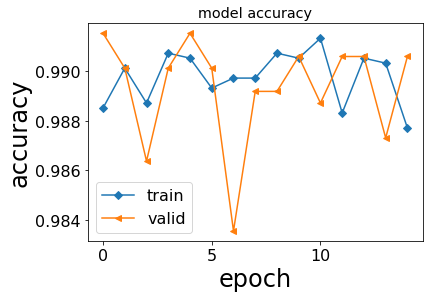

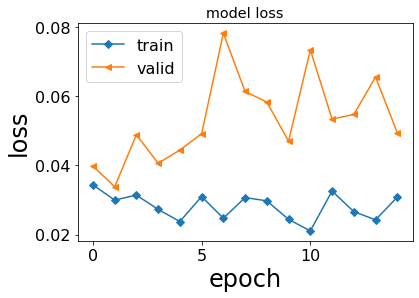

95/95 [==============================] - 0s 524us/step - loss: 0.0327 - accuracy: 0.9888

loss: 0.033

accuracy: 0.989
95/95 [==============================] - 0s 450us/step


{'0': {'precision': 0.9987844408427877,
  'recall': 0.9995944849959448,
  'f1-score': 0.9991892987434131,
  'support': 2466},
 '1': {'precision': 1.0,
  'recall': 0.9863013698630136,
  'f1-score': 0.993103448275862,
  'support': 146},
 '2': {'precision': 0.9888268156424581,
  'recall': 0.8592233009708737,
  'f1-score': 0.9194805194805196,
  'support': 206},
 '3': {'precision': 0.8790322580645161,
  'recall': 0.9864253393665159,
  'f1-score': 0.929637526652452,
  'support': 221},
 'accuracy': 0.9884830536360645,
 'macro avg': {'precision': 0.9666608786374404,
  'recall': 0.957886123799087,
  'f1-score': 0.9603526982880617,
  'support': 3039},
 'weighted avg': {'precision': 0.989459323518565,
  'recall': 0.9884830536360645,
  'f1-score': 0.9884359310801945,
  'support': 3039}}

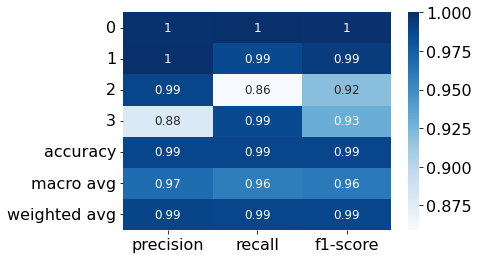

array([[2465,    0,    0,    1],
       [   0,  144,    2,    0],
       [   0,    0,  177,   29],
       [   3,    0,    0,  218]])

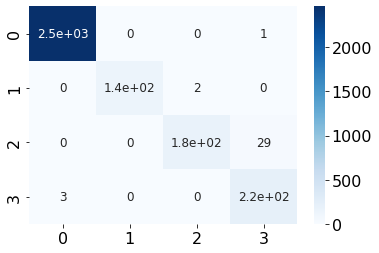

In [134]:
NN_Model_Result(org_train_x, org_train_y,org_test_x, org_test_y,model_org,len(org_test_x),.30,15,5)

In [107]:
# CTEs =  [0.9818304726305069,0.9513499003807213,0.9513499003807213,0.9497653512725016]
# error =[0.004437797577820739,0.01148932477770954,0.01148932477770954,0.009203141244808755]
# types = ['Accuracy','Precision', 'Recall', 'F1-score']
# x_pos = np.arange(len(types))
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Performance')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(types)
# ax.set_title('Error Bar NN Adam Optimizer')
# ax.yaxis.grid(True)
# ax.set_ylim(0.90,.99)
# # Save the figure and show
# plt.tight_layout()
# plt.savefig('NN_error_bar_SCros_Valid_Adam.png')
# plt.show()

# Experiment when data transformed by Min-max Normalization 

Create model

In [108]:
input_dim = len(mNorm_train_frame_x.columns)
def create_model_mNorm():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

Confidence interval for model learned on min max normalized data 

In [109]:
adam_model_mNorm = KerasClassifier(create_model_mNorm,epochs=15, batch_size=5, verbose=0)
adam_model_mNorm.fit(mNorm_train_x, mNorm_train_y.ravel())
X = np.concatenate([mNorm_train_x, mNorm_test_x], axis=0)
y = np.concatenate([mNorm_train_y, mNorm_test_y], axis=0)
cv_score(adam_model_mNorm, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93220/3973709247.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model_mNorm = KerasClassifier(create_model_mNorm,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 476us/step
{'fit_time': array([38.74288988, 38.36377597, 38.5385201 , 38.461092  , 38.620327  ,
       38.29993391, 38.88238311, 38.7593112 , 14.98814297, 15.02567291]), 'score_time': array([0.10312796, 0.10955095, 0.12115097, 0.14952302, 0.08892107,
       0.12199712, 0.07660508, 0.0844748 , 0.06941605, 0.07044506]), 'test_accuracy': array([0.994077  , 0.9970385 , 0.9970385 , 0.99506417, 0.99802567,
       0.99012833, 0.99308983, 0.9970385 , 0.994077  , 0.99011858]), 'test_precision_macro': array([0.97986486, 0.99013158, 0.98957937, 0.9831982 , 0.99358974,
       0.97092528, 0.97357642, 0.9886864 , 0.97969636, 0.96902352]), 'test_recall_macro': array([0.97986486, 0.98612146, 0.98850474, 0.98328226, 0.99253731,
       0.96750449, 0.97524155, 0.99234181, 0.982809  , 0.96233873]), 'test_f1_macro': array([0.97986486, 0.98792621, 0.98900889, 0.98321845, 0.99296537,
       0.96841005, 0.97438211, 0.99039146, 0.98124046, 0.9654385 ])}
accuracy:  0.

In [110]:
model_mNorm = create_model_mNorm()

training and evaluation on min max normalized data 

Epoch 1/15
239/993 [======>.......................] - ETA: 0s - loss: 0.0093 - accuracy: 0.9958

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 865us/step - loss: 0.0106 - accuracy: 0.9960 - val_loss: 0.0323 - val_accuracy: 0.9920
Epoch 2/15
993/993 [==============================] - 1s 813us/step - loss: 0.0115 - accuracy: 0.9952 - val_loss: 0.0336 - val_accuracy: 0.9911
Epoch 3/15
993/993 [==============================] - 1s 818us/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0377 - val_accuracy: 0.9906
Epoch 4/15
993/993 [==============================] - 1s 829us/step - loss: 0.0112 - accuracy: 0.9948 - val_loss: 0.0308 - val_accuracy: 0.9925
Epoch 5/15
993/993 [==============================] - 1s 800us/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0491 - val_accuracy: 0.9878
Epoch 6/15
993/993 [==============================] - 1s 802us/step - loss: 0.0103 - accuracy: 0.9956 - val_loss: 0.0326 - val_accuracy: 0.9929
Epoch 7/15
993/993 [==============================] - 1s 841us/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0318 - val_accuracy: 0.9925
Epo

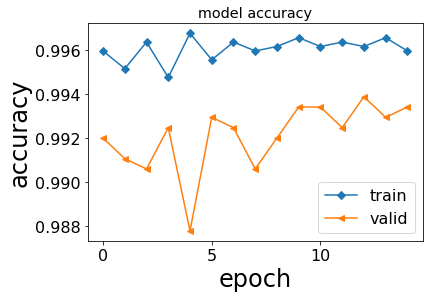

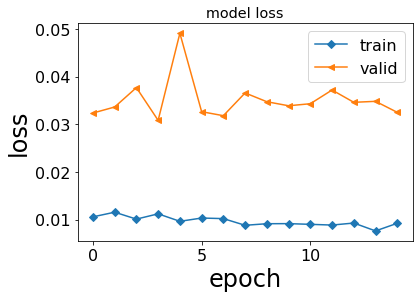

95/95 [==============================] - 0s 677us/step - loss: 0.0172 - accuracy: 0.9954

loss: 0.017

accuracy: 0.995
95/95 [==============================] - 0s 523us/step


{'0': {'precision': 0.9995979091274628,
  'recall': 0.9983935742971888,
  'f1-score': 0.9989953787422142,
  'support': 2490},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 135},
 '2': {'precision': 0.9808612440191388,
  'recall': 0.9624413145539906,
  'f1-score': 0.9715639810426541,
  'support': 213},
 '3': {'precision': 0.9423076923076923,
  'recall': 0.9751243781094527,
  'f1-score': 0.9584352078239609,
  'support': 201},
 'accuracy': 0.9944060546232313,
 'macro avg': {'precision': 0.9806917113635734,
  'recall': 0.9839898167401581,
  'f1-score': 0.9822486419022073,
  'support': 3039},
 'weighted avg': {'precision': 0.9945133546749935,
  'recall': 0.9944060546232313,
  'f1-score': 0.994434714643901,
  'support': 3039}}

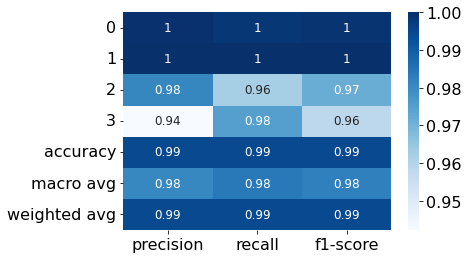

array([[2486,    0,    0,    4],
       [   0,  135,    0,    0],
       [   0,    0,  205,    8],
       [   1,    0,    4,  196]])

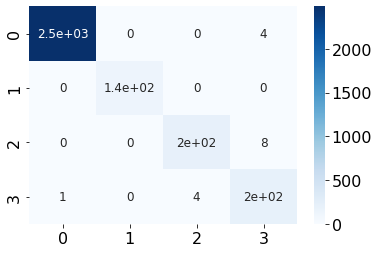

In [129]:
NN_Model_Result(mNorm_train_x, mNorm_train_y,mNorm_test_x, mNorm_test_y,model_mNorm,len(mNorm_test_x),.30,15,5)

# Experiment when data transformed by Z - Normalization 

Model for z normalization

In [112]:
input_dim = len(zNorm_train_frame_x.columns)
def create_model_zNorm():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

confidence interval for model with z-normalized data

In [113]:
adam_model_zNorm = KerasClassifier(create_model_zNorm,epochs=15, batch_size=5, verbose=0)
adam_model_zNorm.fit(zNorm_train_x, zNorm_train_y.ravel())
X = np.concatenate([zNorm_train_x, zNorm_test_x], axis=0)
y = np.concatenate([zNorm_train_y, zNorm_test_y], axis=0)
cv_score(adam_model_zNorm, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93220/812081135.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model_zNorm = KerasClassifier(create_model_zNorm,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 485us/step
{'fit_time': array([38.40038204, 38.62394404, 38.75602412, 38.48986506, 38.61409211,
       38.15663791, 38.70067096, 41.28158021, 15.22707772, 15.12579989]), 'score_time': array([0.10405993, 0.08731699, 0.0794208 , 0.1124239 , 0.09021497,
       0.11105609, 0.07974577, 0.07333088, 0.07446003, 0.07488489]), 'test_accuracy': array([0.99802567, 0.99506417, 0.99308983, 0.9970385 , 0.99605133,
       0.99210267, 0.99210267, 0.9970385 , 0.99012833, 0.99505929]), 'test_precision_macro': array([0.99328829, 0.98260482, 0.97642857, 0.99050633, 0.98889836,
       0.97910726, 0.96774194, 0.9886864 , 0.96595939, 0.98344814]), 'test_recall_macro': array([0.99328829, 0.97859844, 0.97499122, 0.98972603, 0.98595837,
       0.97101449, 0.97826087, 0.99234181, 0.97308554, 0.97961672]), 'test_f1_macro': array([0.99328829, 0.98040384, 0.97522079, 0.98991654, 0.98741752,
       0.97372684, 0.97139498, 0.99039146, 0.96857852, 0.98121055])}
accuracy:  0.

In [114]:
model_zNorm = create_model_zNorm()

prediction and evaluation on z normalized data

Epoch 1/15
237/993 [======>.......................] - ETA: 0s - loss: 0.0103 - accuracy: 0.9975

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 850us/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 0.0323 - val_accuracy: 0.9915
Epoch 2/15
993/993 [==============================] - 1s 785us/step - loss: 0.0100 - accuracy: 0.9954 - val_loss: 0.0364 - val_accuracy: 0.9906
Epoch 3/15
993/993 [==============================] - 1s 760us/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0365 - val_accuracy: 0.9911
Epoch 4/15
993/993 [==============================] - 1s 770us/step - loss: 0.0097 - accuracy: 0.9960 - val_loss: 0.0361 - val_accuracy: 0.9911
Epoch 5/15
993/993 [==============================] - 1s 763us/step - loss: 0.0090 - accuracy: 0.9960 - val_loss: 0.0373 - val_accuracy: 0.9911
Epoch 6/15
993/993 [==============================] - 1s 768us/step - loss: 0.0084 - accuracy: 0.9964 - val_loss: 0.0424 - val_accuracy: 0.9906
Epoch 7/15
993/993 [==============================] - 1s 765us/step - loss: 0.0088 - accuracy: 0.9962 - val_loss: 0.0393 - val_accuracy: 0.9906
Epo

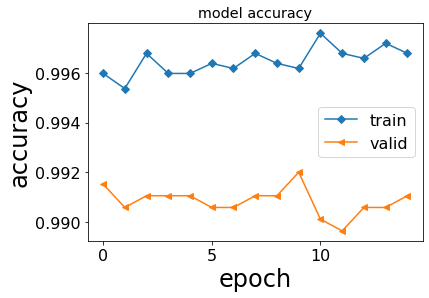

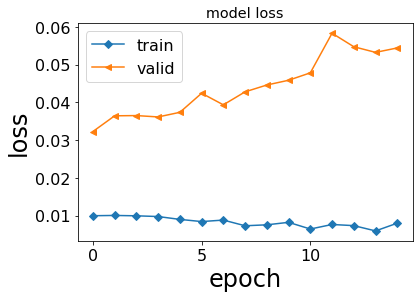

95/95 [==============================] - 0s 548us/step - loss: 0.0210 - accuracy: 0.9951

loss: 0.021

accuracy: 0.995
95/95 [==============================] - 0s 613us/step


{'0': {'precision': 0.9987883683360258,
  'recall': 1.0,
  'f1-score': 0.9993938169327136,
  'support': 2473},
 '1': {'precision': 1.0,
  'recall': 0.9826086956521739,
  'f1-score': 0.9912280701754386,
  'support': 115},
 '2': {'precision': 0.9839357429718876,
  'recall': 0.9879032258064516,
  'f1-score': 0.9859154929577465,
  'support': 248},
 '3': {'precision': 0.9850746268656716,
  'recall': 0.9753694581280788,
  'f1-score': 0.9801980198019801,
  'support': 203},
 'accuracy': 0.9967094438960185,
 'macro avg': {'precision': 0.9919496845433962,
  'recall': 0.9864703448966761,
  'f1-score': 0.9891838499669697,
  'support': 3039},
 'weighted avg': {'precision': 0.9967061034569764,
  'recall': 0.9967094438960185,
  'f1-score': 0.996702657985554,
  'support': 3039}}

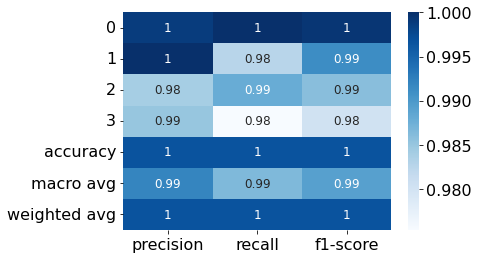

array([[2473,    0,    0,    0],
       [   0,  113,    2,    0],
       [   0,    0,  245,    3],
       [   3,    0,    2,  198]])

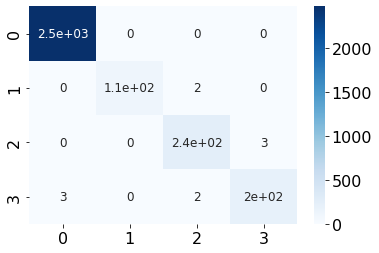

In [130]:
NN_Model_Result(zNorm_train_x, zNorm_train_y,zNorm_test_x, zNorm_test_y,model_zNorm,len(zNorm_test_x),.30,15,5)

# Experient with new feature set by FA 

In [116]:
input_dim = len(fa_train_frame_x.columns)
def create_model_fa():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

Confidence of the model learned on FA based reduced feature data

In [117]:
adam_model_fa = KerasClassifier(create_model_fa,epochs=15, batch_size=5, verbose=0)
adam_model_fa.fit(fa_train_x, fa_train_y.ravel())
X = np.concatenate([fa_train_x, fa_test_x], axis=0)
y = np.concatenate([fa_train_y, fa_test_y], axis=0)
cv_score(adam_model_fa, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93220/1630866979.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model_fa = KerasClassifier(create_model_fa,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 572us/step
{'fit_time': array([45.6489799 , 45.25432396, 45.78764677, 45.62314391, 45.29653597,
       82.45669198, 45.76577806, 45.76262903, 34.14219999, 34.00291395]), 'score_time': array([0.12807417, 0.19227791, 0.10042715, 0.14522314, 0.19333792,
       0.10340214, 0.09944201, 0.08812404, 0.09288716, 0.08908606]), 'test_accuracy': array([0.99605133, 0.99605133, 0.994077  , 0.99506417, 0.9911155 ,
       0.994077  , 0.9911155 , 0.99605133, 0.988154  , 0.99110672]), 'test_precision_macro': array([0.98365868, 0.98583333, 0.97928571, 0.9861721 , 0.97186732,
       0.98365385, 0.97468578, 0.98540058, 0.96308717, 0.97043269]), 'test_recall_macro': array([0.98662162, 0.9826968 , 0.9779835 , 0.98314708, 0.97249447,
       0.98157918, 0.96598229, 0.98866534, 0.9721451 , 0.96552406]), 'test_f1_macro': array([0.98504513, 0.98417133, 0.97860287, 0.98464802, 0.97160219,
       0.98225109, 0.97028404, 0.98678352, 0.96751059, 0.9672599 ])}
accuracy:  0.

In [118]:
model_fa = create_model_fa()

prediction and evaluation for model learned on fa data

Epoch 1/15
249/993 [======>.......................] - ETA: 0s - loss: 0.0076 - accuracy: 0.9968

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 792us/step - loss: 0.0090 - accuracy: 0.9962 - val_loss: 0.0279 - val_accuracy: 0.9915
Epoch 2/15
993/993 [==============================] - 1s 786us/step - loss: 0.0085 - accuracy: 0.9962 - val_loss: 0.0276 - val_accuracy: 0.9929
Epoch 3/15
993/993 [==============================] - 1s 752us/step - loss: 0.0084 - accuracy: 0.9964 - val_loss: 0.0297 - val_accuracy: 0.9934
Epoch 4/15
993/993 [==============================] - 1s 756us/step - loss: 0.0080 - accuracy: 0.9964 - val_loss: 0.0318 - val_accuracy: 0.9934
Epoch 5/15
993/993 [==============================] - 1s 751us/step - loss: 0.0087 - accuracy: 0.9966 - val_loss: 0.0317 - val_accuracy: 0.9929
Epoch 6/15
993/993 [==============================] - 1s 752us/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0310 - val_accuracy: 0.9929
Epoch 7/15
993/993 [==============================] - 1s 755us/step - loss: 0.0079 - accuracy: 0.9970 - val_loss: 0.0329 - val_accuracy: 0.9939
Epo

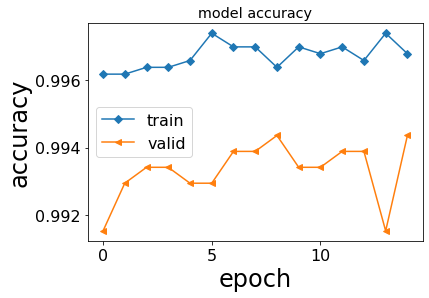

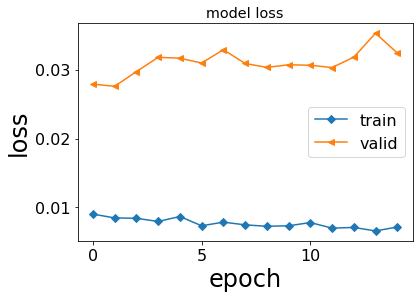

95/95 [==============================] - 0s 554us/step - loss: 0.0192 - accuracy: 0.9957

loss: 0.019

accuracy: 0.996
95/95 [==============================] - 0s 479us/step


{'0': {'precision': 0.9991783073130649,
  'recall': 1.0,
  'f1-score': 0.9995889847924373,
  'support': 2432},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 135},
 '2': {'precision': 0.9830508474576272,
  'recall': 0.9586776859504132,
  'f1-score': 0.9707112970711298,
  'support': 242},
 '3': {'precision': 0.9572649572649573,
  'recall': 0.9739130434782609,
  'f1-score': 0.9655172413793104,
  'support': 230},
 'accuracy': 0.9947351102336295,
 'macro avg': {'precision': 0.9848735280089124,
  'recall': 0.9831476823571685,
  'f1-score': 0.9839543808107194,
  'support': 3039},
 'weighted avg': {'precision': 0.9947584365386839,
  'recall': 0.9947351102336295,
  'f1-score': 0.9947290261348016,
  'support': 3039}}

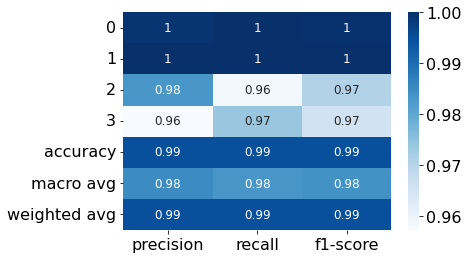

array([[2432,    0,    0,    0],
       [   0,  135,    0,    0],
       [   0,    0,  232,   10],
       [   2,    0,    4,  224]])

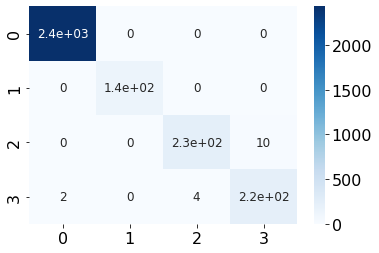

In [131]:
NN_Model_Result(fa_train_x, fa_train_y,fa_test_x, fa_test_y,model_fa,len(fa_test_x),.30,15,5)

# Experiment with feature representation by LDA

In [120]:
input_dim = len(lda_train_frame_x.columns)
def create_model_lda():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

Confidence interval for the model learned on lda data

In [121]:
adam_model_lda = KerasClassifier(create_model_lda,epochs=15, batch_size=5, verbose=0)
adam_model_lda.fit(lda_train_x, lda_train_y.ravel())
X = np.concatenate([lda_train_x, lda_test_x], axis=0)
y = np.concatenate([lda_train_y, lda_test_y], axis=0)
cv_score(adam_model_lda, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93220/2780403577.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model_lda = KerasClassifier(create_model_lda,epochs=15, batch_size=5, verbose=0)


 1/32 [..............................] - ETA: 1s

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 1ms/step


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 618us/step
{'fit_time': array([45.78128481, 45.5883069 , 45.57432103, 45.74021125, 45.13357472,
       45.3570199 , 45.17756796, 45.00204206, 33.30028582, 33.08010316]), 'score_time': array([0.13161802, 0.19222093, 0.12555885, 0.13361096, 0.172297  ,
       0.24503231, 0.24695802, 0.25095081, 0.09849715, 0.0978651 ]), 'test_accuracy': array([0.95557749, 0.99308983, 0.9911155 , 0.95064166, 0.98617966,
       0.8094768 , 0.988154  , 0.99012833, 0.93484699, 0.98418972]), 'test_precision_macro': array([0.65253868, 0.9681677 , 0.97805026, 0.63536048, 0.96241646,
       0.2023692 , 0.95908289, 0.96958907, 0.61153908, 0.95692355]), 'test_recall_macro': array([0.72981982, 0.97309653, 0.96804142, 0.73324775, 0.95858871,
       0.25      , 0.96356683, 0.97013308, 0.72182042, 0.94398624]), 'test_f1_macro': array([0.68254506, 0.97026099, 0.97279431, 0.67584292, 0.95885332,
       0.22367703, 0.9594725 , 0.96862303, 0.65179297, 0.9476817 ])}
accuracy:  0.

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
model_lda = create_model_lda()

prediction and evaluation of the model learned on lda

Epoch 1/15
258/993 [======>.......................] - ETA: 0s - loss: 0.1501 - accuracy: 0.9922

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 784us/step - loss: 0.1194 - accuracy: 0.9907 - val_loss: 0.1171 - val_accuracy: 0.9873
Epoch 2/15
993/993 [==============================] - 1s 752us/step - loss: 0.1163 - accuracy: 0.9907 - val_loss: 0.1141 - val_accuracy: 0.9878
Epoch 3/15
993/993 [==============================] - 1s 745us/step - loss: 0.1140 - accuracy: 0.9907 - val_loss: 0.1132 - val_accuracy: 0.9873
Epoch 4/15
993/993 [==============================] - 1s 749us/step - loss: 0.1118 - accuracy: 0.9907 - val_loss: 0.1106 - val_accuracy: 0.9878
Epoch 5/15
993/993 [==============================] - 1s 748us/step - loss: 0.1096 - accuracy: 0.9907 - val_loss: 0.1099 - val_accuracy: 0.9873
Epoch 6/15
993/993 [==============================] - 1s 747us/step - loss: 0.1083 - accuracy: 0.9909 - val_loss: 0.1082 - val_accuracy: 0.9878
Epoch 7/15
993/993 [==============================] - 1s 759us/step - loss: 0.1065 - accuracy: 0.9907 - val_loss: 0.1080 - val_accuracy: 0.9882
Epo

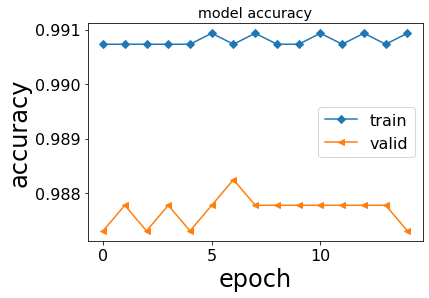

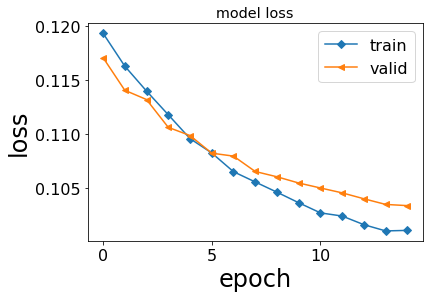

95/95 [==============================] - 0s 551us/step - loss: 0.1242 - accuracy: 0.9875

loss: 0.124

accuracy: 0.987
95/95 [==============================] - 0s 468us/step


{'0': {'precision': 0.9975629569455727,
  'recall': 0.9987799918666125,
  'f1-score': 0.9981711034342614,
  'support': 2459},
 '1': {'precision': 1.0,
  'recall': 0.9866666666666667,
  'f1-score': 0.9932885906040269,
  'support': 150},
 '2': {'precision': 0.9862385321100917,
  'recall': 0.8847736625514403,
  'f1-score': 0.9327548806941431,
  'support': 243},
 '3': {'precision': 0.8578199052132701,
  'recall': 0.9679144385026738,
  'f1-score': 0.9095477386934673,
  'support': 187},
 'accuracy': 0.9871668311944719,
 'macro avg': {'precision': 0.9604053485672337,
  'recall': 0.9595336898968483,
  'f1-score': 0.9584405783564747,
  'support': 3039},
 'weighted avg': {'precision': 0.9881788735461657,
  'recall': 0.9871668311944719,
  'f1-score': 0.9872460990720002,
  'support': 3039}}

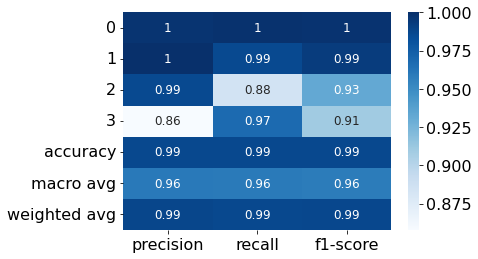

array([[2456,    0,    0,    3],
       [   0,  148,    2,    0],
       [   1,    0,  215,   27],
       [   5,    0,    1,  181]])

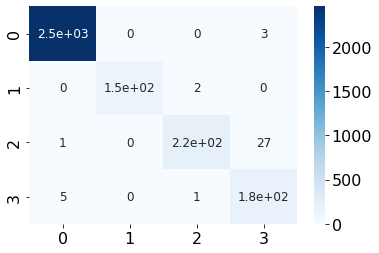

In [132]:
NN_Model_Result(lda_train_x, lda_train_y,lda_test_x,lda_test_y,model_lda,len(lda_test_x),.30,15,5)

# Experiment with features by PCA

In [124]:
input_dim = len(pca_train_frame_x.columns)
def create_model_pca():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

Confidence of the model learned on PCA based reduced data

In [125]:
adam_model_pca = KerasClassifier(create_model_pca,epochs=15, batch_size=5, verbose=0)
adam_model_pca.fit(pca_train_x, pca_train_y.ravel())
X = np.concatenate([pca_train_x, pca_test_x], axis=0)
y = np.concatenate([pca_train_y, pca_test_y], axis=0)
cv_score(adam_model_pca, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93220/3631087200.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model_pca = KerasClassifier(create_model_pca,epochs=15, batch_size=5, verbose=0)


32/32 [==============================] - 0s 1ms/step
{'fit_time': array([60.78344321, 60.90805101, 82.68456507, 60.51995802, 60.82303214,
       60.95876813, 61.07832313, 60.61423397, 17.34999609, 17.47912002]), 'score_time': array([0.15549088, 0.139956  , 0.11348605, 0.20883799, 0.1581018 ,
       0.13487911, 0.12541509, 0.19631624, 0.07568789, 0.06945801]), 'test_accuracy': array([0.988154  , 0.99210267, 0.98914116, 0.99012833, 0.988154  ,
       0.988154  , 0.994077  , 0.9911155 , 0.9851925 , 0.98517787]), 'test_precision_macro': array([0.97061497, 0.9787829 , 0.96202444, 0.96283173, 0.96152346,
       0.96202426, 0.975     , 0.971875  , 0.95202958, 0.9535849 ]), 'test_recall_macro': array([0.95687803, 0.9647199 , 0.96241664, 0.96669971, 0.96384205,
       0.95986622, 0.98369565, 0.96767603, 0.96110614, 0.94503154]), 'test_f1_macro': array([0.96227985, 0.97117514, 0.96183637, 0.96407915, 0.96263026,
       0.96050897, 0.97841514, 0.96839529, 0.95645048, 0.94809753])}
accuracy:  0.98

In [126]:
model_pca = create_model_pca()

Prediction and evaluation of the PCA learned model

Epoch 1/15
257/993 [======>.......................] - ETA: 0s - loss: 0.0207 - accuracy: 0.9930

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 807us/step - loss: 0.0265 - accuracy: 0.9893 - val_loss: 0.0406 - val_accuracy: 0.9864
Epoch 2/15
993/993 [==============================] - 1s 757us/step - loss: 0.0242 - accuracy: 0.9905 - val_loss: 0.0393 - val_accuracy: 0.9845
Epoch 3/15
993/993 [==============================] - 1s 761us/step - loss: 0.0242 - accuracy: 0.9899 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 4/15
993/993 [==============================] - 1s 763us/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 5/15
993/993 [==============================] - 1s 764us/step - loss: 0.0220 - accuracy: 0.9921 - val_loss: 0.0396 - val_accuracy: 0.9864
Epoch 6/15
993/993 [==============================] - 1s 767us/step - loss: 0.0215 - accuracy: 0.9911 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 7/15
993/993 [==============================] - 1s 761us/step - loss: 0.0191 - accuracy: 0.9925 - val_loss: 0.0424 - val_accuracy: 0.9859
Epo

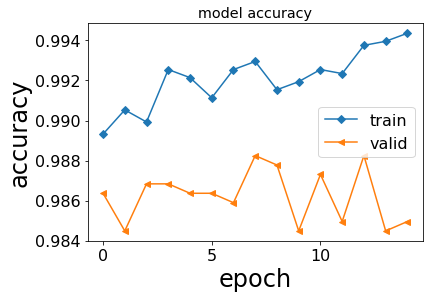

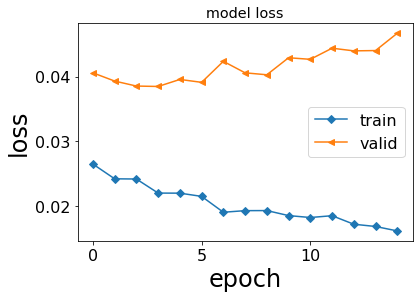

95/95 [==============================] - 0s 542us/step - loss: 0.0435 - accuracy: 0.9882

loss: 0.044

accuracy: 0.988
95/95 [==============================] - 0s 475us/step


{'0': {'precision': 0.9987903225806452,
  'recall': 0.9979854955680902,
  'f1-score': 0.9983877468762595,
  'support': 2482},
 '1': {'precision': 0.9826086956521739,
  'recall': 0.9741379310344828,
  'f1-score': 0.9783549783549784,
  'support': 116},
 '2': {'precision': 0.9517543859649122,
  'recall': 0.9234042553191489,
  'f1-score': 0.937365010799136,
  'support': 235},
 '3': {'precision': 0.9027777777777778,
  'recall': 0.9466019417475728,
  'f1-score': 0.9241706161137441,
  'support': 206},
 'accuracy': 0.9878249424152682,
 'macro avg': {'precision': 0.9589827954938772,
  'recall': 0.9605324059173237,
  'f1-score': 0.9595695880360295,
  'support': 3039},
 'weighted avg': {'precision': 0.9880272103536657,
  'recall': 0.9878249424152682,
  'f1-score': 0.9878734747263185,
  'support': 3039}}

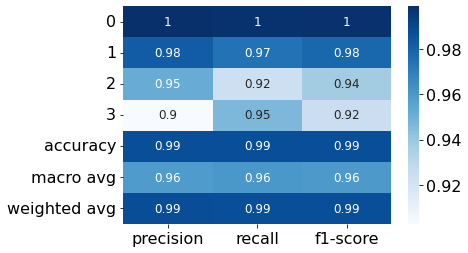

array([[2477,    1,    3,    1],
       [   0,  113,    1,    2],
       [   0,    0,  217,   18],
       [   3,    1,    7,  195]])

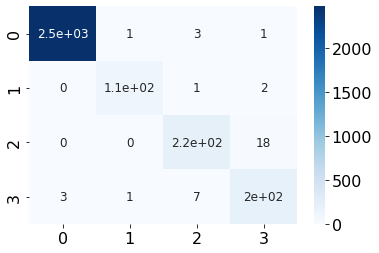

In [133]:
NN_Model_Result(pca_train_x, pca_train_y,pca_test_x,pca_test_y,model_pca,len(pca_test_x),.30,15,5)

# Experiment with TSNE based feature representation data

In [78]:
input_dim = len(tsne_train_frame_x.columns)
def create_model_tsne():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

confidence of the model learned on TSNE feature representation

In [ ]:
adam_model_tsne = KerasClassifier(create_model,epochs=15, batch_size=5, verbose=0)
adam_model_tsne.fit(tsne_train_x, tsne_train_y.ravel())
X = np.concatenate([tsne_train_x, tsne_test_x], axis=0)
y = np.concatenate([tsne_train_y, tsne_test_y], axis=0)
cv_score(adam_model_tsne, X, y.ravel())

In [79]:
model_tsne = create_model_tsne()

Prediction and evaluation of model learned on TSNE feature representation

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 862us/step - loss: 16.9521 - accuracy: 0.1511 - val_loss: 1.3254 - val_accuracy: 0.4448
Epoch 2/15
993/993 [==============================] - 1s 794us/step - loss: 0.5968 - accuracy: 0.7850 - val_loss: 0.4687 - val_accuracy: 0.8228
Epoch 3/15
993/993 [==============================] - 1s 746us/step - loss: 0.4768 - accuracy: 0.8078 - val_loss: 0.4239 - val_accuracy: 0.8228
Epoch 4/15
993/993 [==============================] - 1s 750us/step - loss: 0.4433 - accuracy: 0.8078 - val_loss: 0.3982 - val_accuracy: 0.8228
Epoch 5/15
993/993 [==============================] - 1s 746us/step - loss: 0.4157 - accuracy: 0.8078 - val_loss: 0.3703 - val_accuracy: 0.8228
Epoch 6/15
993/993 [==============================] - 1s 753us/step - loss: 0.3968 - accuracy: 0.8247 - val_loss: 0.3621 - val_accuracy: 0.8449
Epoch 7/15
993/993 [==============================] - 1s 750us/step - loss: 0.3873 - accuracy: 0.8320 - val_loss: 0.3507 - val_accuracy: 0.8510
Ep

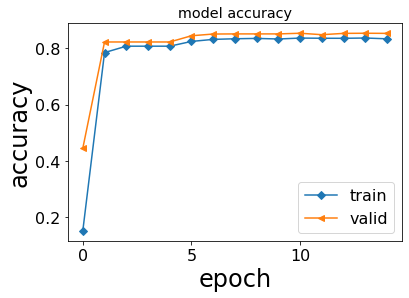

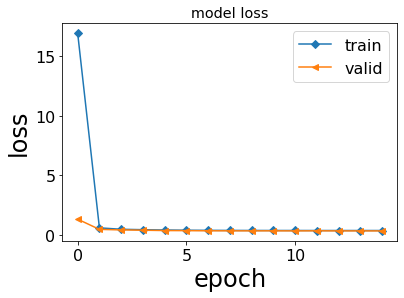

95/95 [==============================] - 0s 543us/step - loss: 0.3600 - accuracy: 0.8450

loss: 0.360

accuracy: 0.845
7/7 [==============================] - 0s 668us/step


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

{'0': {'precision': 0.9186046511627907,
  'recall': 0.9693251533742331,
  'f1-score': 0.9432835820895521,
  'support': 163},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 13},
 '2': {'precision': 0.17857142857142858,
  'recall': 0.5555555555555556,
  'f1-score': 0.2702702702702703,
  'support': 9},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15},
 'accuracy': 0.815,
 'macro avg': {'precision': 0.2742940199335548,
  'recall': 0.38122017723244717,
  'f1-score': 0.3033884630899556,
  'support': 200},
 'weighted avg': {'precision': 0.7566985049833888,
  'recall': 0.815,
  'f1-score': 0.780938281565147,
  'support': 200}}

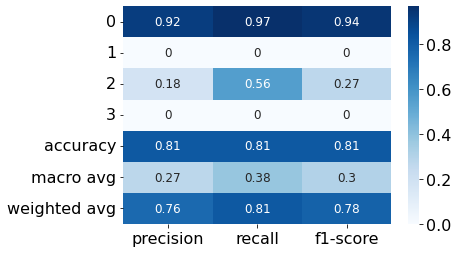

array([[158,   0,   5,   0],
       [  0,   0,  13,   0],
       [  4,   0,   5,   0],
       [ 10,   0,   5,   0]])

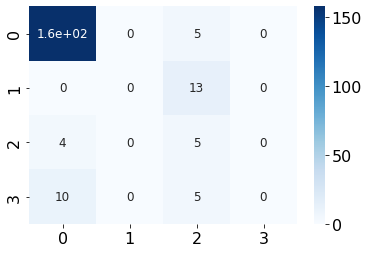

In [80]:
NN_Model_Result(tsne_train_x, tsne_train_y,tsne_test_x,tsne_test_y,model_tsne,200,.30,15,5)